In [1]:
#Deep_Learning - Convolutional_Neural_Network -Image_Classification - End_to_End-Implementation -

In [2]:
#Import libraries -
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Flatten
from tensorflow.keras import layers, models
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#Step-1- Load the DataSet and split it in train and test  parts -
X_train =np.loadtxt('F:/VIJAY SHINDE/Courses_undertaken/Data_Science_with_Python\DS_by_TECHNOGEEKS/Daily lectures/September-2022/07-09-2022-Deep_Learning_End_to_End/Convolutional_Neural_Network/Image Classification CNN Keras Dataset/input.csv',delimiter = ',')
X_test =np.loadtxt('F:/VIJAY SHINDE/Courses_undertaken/Data_Science_with_Python\DS_by_TECHNOGEEKS/Daily lectures/September-2022/07-09-2022-Deep_Learning_End_to_End/Convolutional_Neural_Network/Image Classification CNN Keras Dataset/input_test.csv',delimiter = ',')

y_train =np.loadtxt('F:/VIJAY SHINDE/Courses_undertaken/Data_Science_with_Python\DS_by_TECHNOGEEKS/Daily lectures/September-2022/07-09-2022-Deep_Learning_End_to_End/Convolutional_Neural_Network/Image Classification CNN Keras Dataset/labels.csv',delimiter = ',')
y_test =np.loadtxt('F:/VIJAY SHINDE/Courses_undertaken/Data_Science_with_Python\DS_by_TECHNOGEEKS/Daily lectures/September-2022/07-09-2022-Deep_Learning_End_to_End/Convolutional_Neural_Network/Image Classification CNN Keras Dataset/labels_test.csv',delimiter = ',')

In [4]:
#Lets see the shape of the dataset -Here in output you will see -2000 nos of imeages,(1000x1000)pixel x3(RGB color)
print('shape of X_train',X_train.shape)
print('shape of X_test',X_test.shape)

print('shape of y_train',y_train.shape) 
print('shape of y-test',y_test.shape)  

shape of X_train (2000, 30000)
shape of X_test (400, 30000)
shape of y_train (2000,)
shape of y-test (400,)


In [5]:
#Lets reshape the imeages -
X_train = X_train.reshape(len(X_train),100,100,3)
X_test = X_test.reshape(len(X_test),100,100,3)

y_train = y_train.reshape(len(y_train),1)
y_test = y_test.reshape(len(y_test),1)

In [6]:
#Lets Normalize the values - i-e imeage pixel is ranging from 0-255 but after normalizing it onverts in binary i.e- 0 and 1 
X_train = X_train/255.0
X_test = X_test/255.0

In [7]:
#Lets see the shape of the dataset -Here in output you will see - 2000 nos of imeages,(100x100)pixelx3(RGB color)
print('shape of X_train',X_train.shape)
print('shape of X_test',X_test.shape)

print('shape of y_train',y_train.shape) 
print('shape of y-test',y_test.shape)

shape of X_train (2000, 100, 100, 3)
shape of X_test (400, 100, 100, 3)
shape of y_train (2000, 1)
shape of y-test (400, 1)


In [8]:
#Lets print single imeage data -
X_train[1,:]

array([[[0.51372549, 0.50196078, 0.52941176],
        [0.62745098, 0.61568627, 0.64313725],
        [0.77647059, 0.75294118, 0.8       ],
        ...,
        [0.98039216, 0.97647059, 0.96862745],
        [1.        , 1.        , 0.99215686],
        [0.98039216, 0.97647059, 0.96078431]],

       [[0.54901961, 0.5372549 , 0.56470588],
        [0.49803922, 0.48627451, 0.51372549],
        [0.47058824, 0.44705882, 0.48627451],
        ...,
        [0.98431373, 0.99215686, 0.98823529],
        [0.99607843, 1.        , 0.99215686],
        [0.99607843, 1.        , 0.98431373]],

       [[0.8       , 0.79215686, 0.81176471],
        [0.73333333, 0.7254902 , 0.74509804],
        [0.57647059, 0.55686275, 0.58039216],
        ...,
        [0.97647059, 1.        , 1.        ],
        [0.93333333, 0.96862745, 0.94901961],
        [0.90980392, 0.94509804, 0.9254902 ]],

       ...,

       [[0.68235294, 0.71372549, 0.76470588],
        [0.6745098 , 0.70588235, 0.75686275],
        [0.69803922, 0

<function matplotlib.pyplot.show(close=None, block=None)>

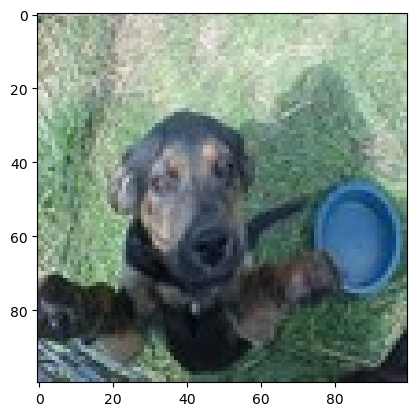

In [9]:
#Lets print some images by indexing-
plt.imshow(X_train[3,])
plt.show

In [10]:
#Step -2 Create the object for the algorithm - 
classifier = Sequential()  #Initilize the Algorithm

In [11]:
#Lets add first cnn layer -
classifier.add(layers.Conv2D(32,(3,3),activation='relu',input_shape=(100,100,3))) #32 filters(size of filter),i/p-shape of imeage(100,100,3)

In [12]:
#Lets add first Pooling layer - Maximum pulling layer -
classifier.add(layers.MaxPooling2D((2, 2))) #filter size

In [13]:
#Lets add second cnn layer -
classifier.add(layers.Conv2D(64,(3,3),activation='relu'))

In [14]:
#Lets add second Pooling layer - Maximum pulling layer -
classifier.add(layers.MaxPooling2D((2, 2))) #filter size

In [15]:
#Lets add Flattening layer -
classifier.add(layers.Flatten())

In [16]:
#Lets apply ANN layer of 64 input neurons -
classifier.add(layers.Dense(64,activation='relu'))

In [17]:
#Lets add Output layer -
classifier.add(layers.Dense(1,activation='sigmoid')) #sigmoid is good for binary classification

In [18]:
#Lets apply the Early stopping - Stop Training when monitored metrics stop imporving),Otherwise mention epochs value only -
import tensorflow as tf
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',min_delta=0.0001,patience=10,verbose=1,mode='auto',baseline=None,restore_best_weights=False)

In [19]:
#Lets compile the classifier -
classifier.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
classifier_history = classifier.fit(X_train,y_train, epochs=8,validation_split=0.33,callbacks=early_stopping)

Epoch 1/8
42/42 [==============================] - 20s 347ms/step - loss: 0.6297 - accuracy: 0.7199 - val_loss: 1.6597 - val_accuracy: 0.0000e+00
Epoch 2/8
42/42 [==============================] - 14s 328ms/step - loss: 0.5558 - accuracy: 0.7468 - val_loss: 1.2654 - val_accuracy: 0.0000e+00
Epoch 3/8
42/42 [==============================] - 14s 327ms/step - loss: 0.5192 - accuracy: 0.7446 - val_loss: 1.3099 - val_accuracy: 0.0000e+00
Epoch 4/8
42/42 [==============================] - 13s 320ms/step - loss: 0.4731 - accuracy: 0.7603 - val_loss: 1.2034 - val_accuracy: 0.0787
Epoch 5/8
42/42 [==============================] - 14s 337ms/step - loss: 0.4256 - accuracy: 0.7961 - val_loss: 1.0885 - val_accuracy: 0.2980
Epoch 6/8
42/42 [==============================] - 14s 336ms/step - loss: 0.3636 - accuracy: 0.8447 - val_loss: 1.2395 - val_accuracy: 0.3722
Epoch 7/8
42/42 [==============================] - 14s 332ms/step - loss: 0.3066 - accuracy: 0.8611 - val_loss: 1.1766 - val_accuracy: 0

In [20]:
#Step-2- Prediction the Y-axis values - 
predict_cnn = classifier.predict(X_test)
predict_cnn = predict_cnn > 0.5 # accuracy gretter than 0.5 =1 otherwise 0

13/13 [==============================] - 1s 77ms/step


In [21]:
#Step-3- Model Evaluation and Error check -
from sklearn.metrics import accuracy_score,confusion_matrix
print(confusion_matrix(predict_cnn,y_test))
print('accuracy_score:',accuracy_score(y_test,predict_cnn))

[[175 115]
 [ 25  85]]
accuracy_score: 0.65


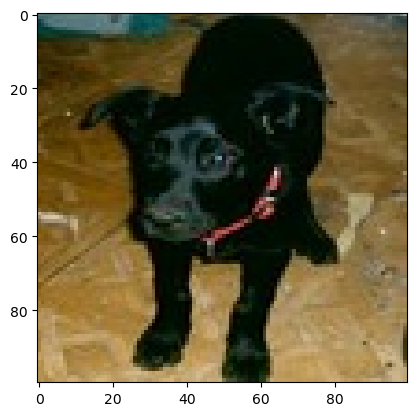

1/1 [==============================] - 0s 79ms/step
Its a : Dog


In [25]:
#Lets make the Prediction Here-Itself - 
import random
a=random.randint(0,len(y_test))
plt.imshow(X_test[a,:])
plt.show()

predict_cnn = classifier.predict(X_test[a, :].reshape(1,100,100,3))
predict_cnn = predict_cnn > 0.5
if predict_cnn ==0:
    pred='Dog'
else:
    pred='Cat'
print('Its a :',pred)